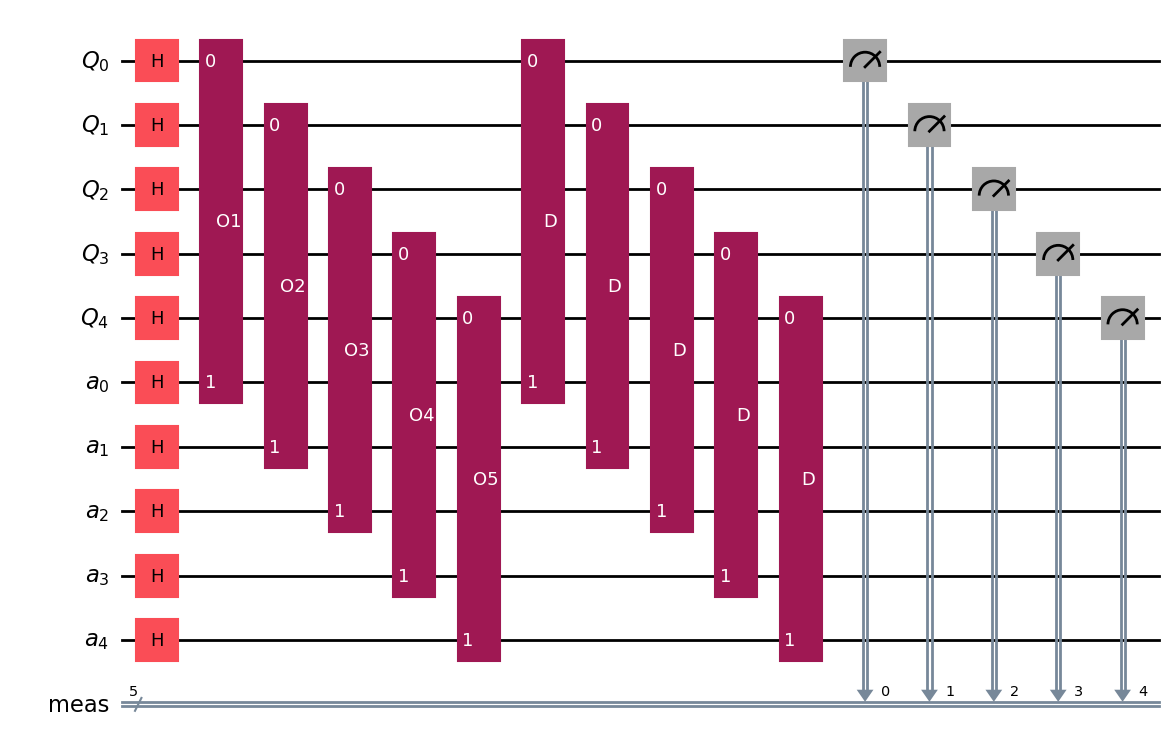

In [1]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit.quantum_info import Statevector,Operator,DensityMatrix
from qiskit.visualization import plot_histogram,plot_bloch_multivector
from qiskit.primitives import Sampler

qr = QuantumRegister(5,'Q')
qr_ancilla = QuantumRegister(5,'a')
cr = ClassicalRegister(5,'meas')

qc = QuantumCircuit(qr,qr_ancilla,cr)
qc.h(qr)
qc.h(qr_ancilla)
# qc.draw('mpl')

fixed_initial_superposition_state = Statevector.from_label('++')
# plot_bloch_multivector(fixed_initial_superposition_state)

marked_state1 = Statevector.from_label('01')
marked_state2 = Statevector.from_label('00')
marked_state3 = Statevector.from_label('01')
marked_state4 = Statevector.from_label('01')
marked_state5 = Statevector.from_label('01')
# marked_state2.draw('latex')

grover_oracle1 = Operator.from_label('II') - 2* DensityMatrix(marked_state1)
grover_oracle2 = Operator.from_label('II') - 2* DensityMatrix(marked_state2)
grover_oracle3 = Operator.from_label('II') - 2* DensityMatrix(marked_state3)
grover_oracle4 = Operator.from_label('II') - 2* DensityMatrix(marked_state4)
grover_oracle5 = Operator.from_label('II') - 2* DensityMatrix(marked_state5)
# grover_oracle1.draw('latex')

fixed_grover_diffusion_op = 2* DensityMatrix(fixed_initial_superposition_state) - Operator.from_label('II')
# fixed_grover_diffusion_op.draw('latex')

qc.unitary(grover_oracle1,[qr[0],qr_ancilla[0]],'O1')
qc.unitary(grover_oracle2,[qr[1],qr_ancilla[1]],'O2')
qc.unitary(grover_oracle3,[qr[2],qr_ancilla[2]],'O3')
qc.unitary(grover_oracle4,[qr[3],qr_ancilla[3]],'O4')
qc.unitary(grover_oracle5,[qr[4],qr_ancilla[4]],'O5')
# qc.draw('mpl')

qc.unitary(fixed_grover_diffusion_op,[qr[0],qr_ancilla[0]],'D')
qc.unitary(fixed_grover_diffusion_op,[qr[1],qr_ancilla[1]],'D')
qc.unitary(fixed_grover_diffusion_op,[qr[2],qr_ancilla[2]],'D')
qc.unitary(fixed_grover_diffusion_op,[qr[3],qr_ancilla[3]],'D')
qc.unitary(fixed_grover_diffusion_op,[qr[4],qr_ancilla[4]],'D')
# qc.draw('mpl')


qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)
qc.measure(4,4)
qc.draw('mpl',reverse_bits=False)





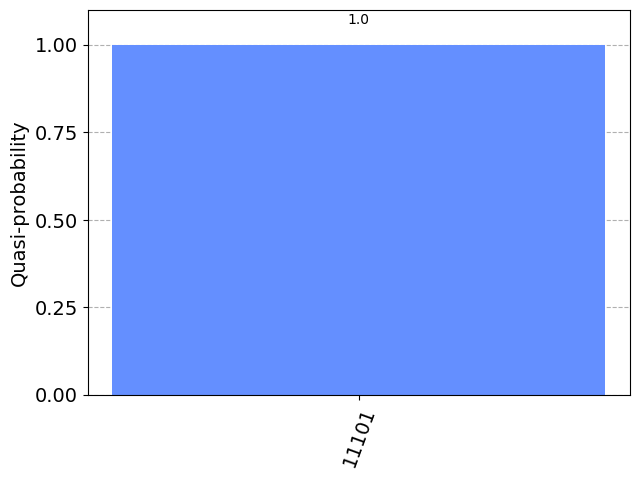

In [2]:
sampler = Sampler()
job = sampler.run(qc)
counts = job.result().quasi_dists[0]


def binary_counts(counts:dict,num_qubits:int):
    bindigits = 2 ** num_qubits
    bin_counts = {f"{key:0{num_qubits}b}" : value for key , value in counts.items()}
    return bin_counts

bin_counts = binary_counts(counts,5)

plot_histogram(bin_counts)

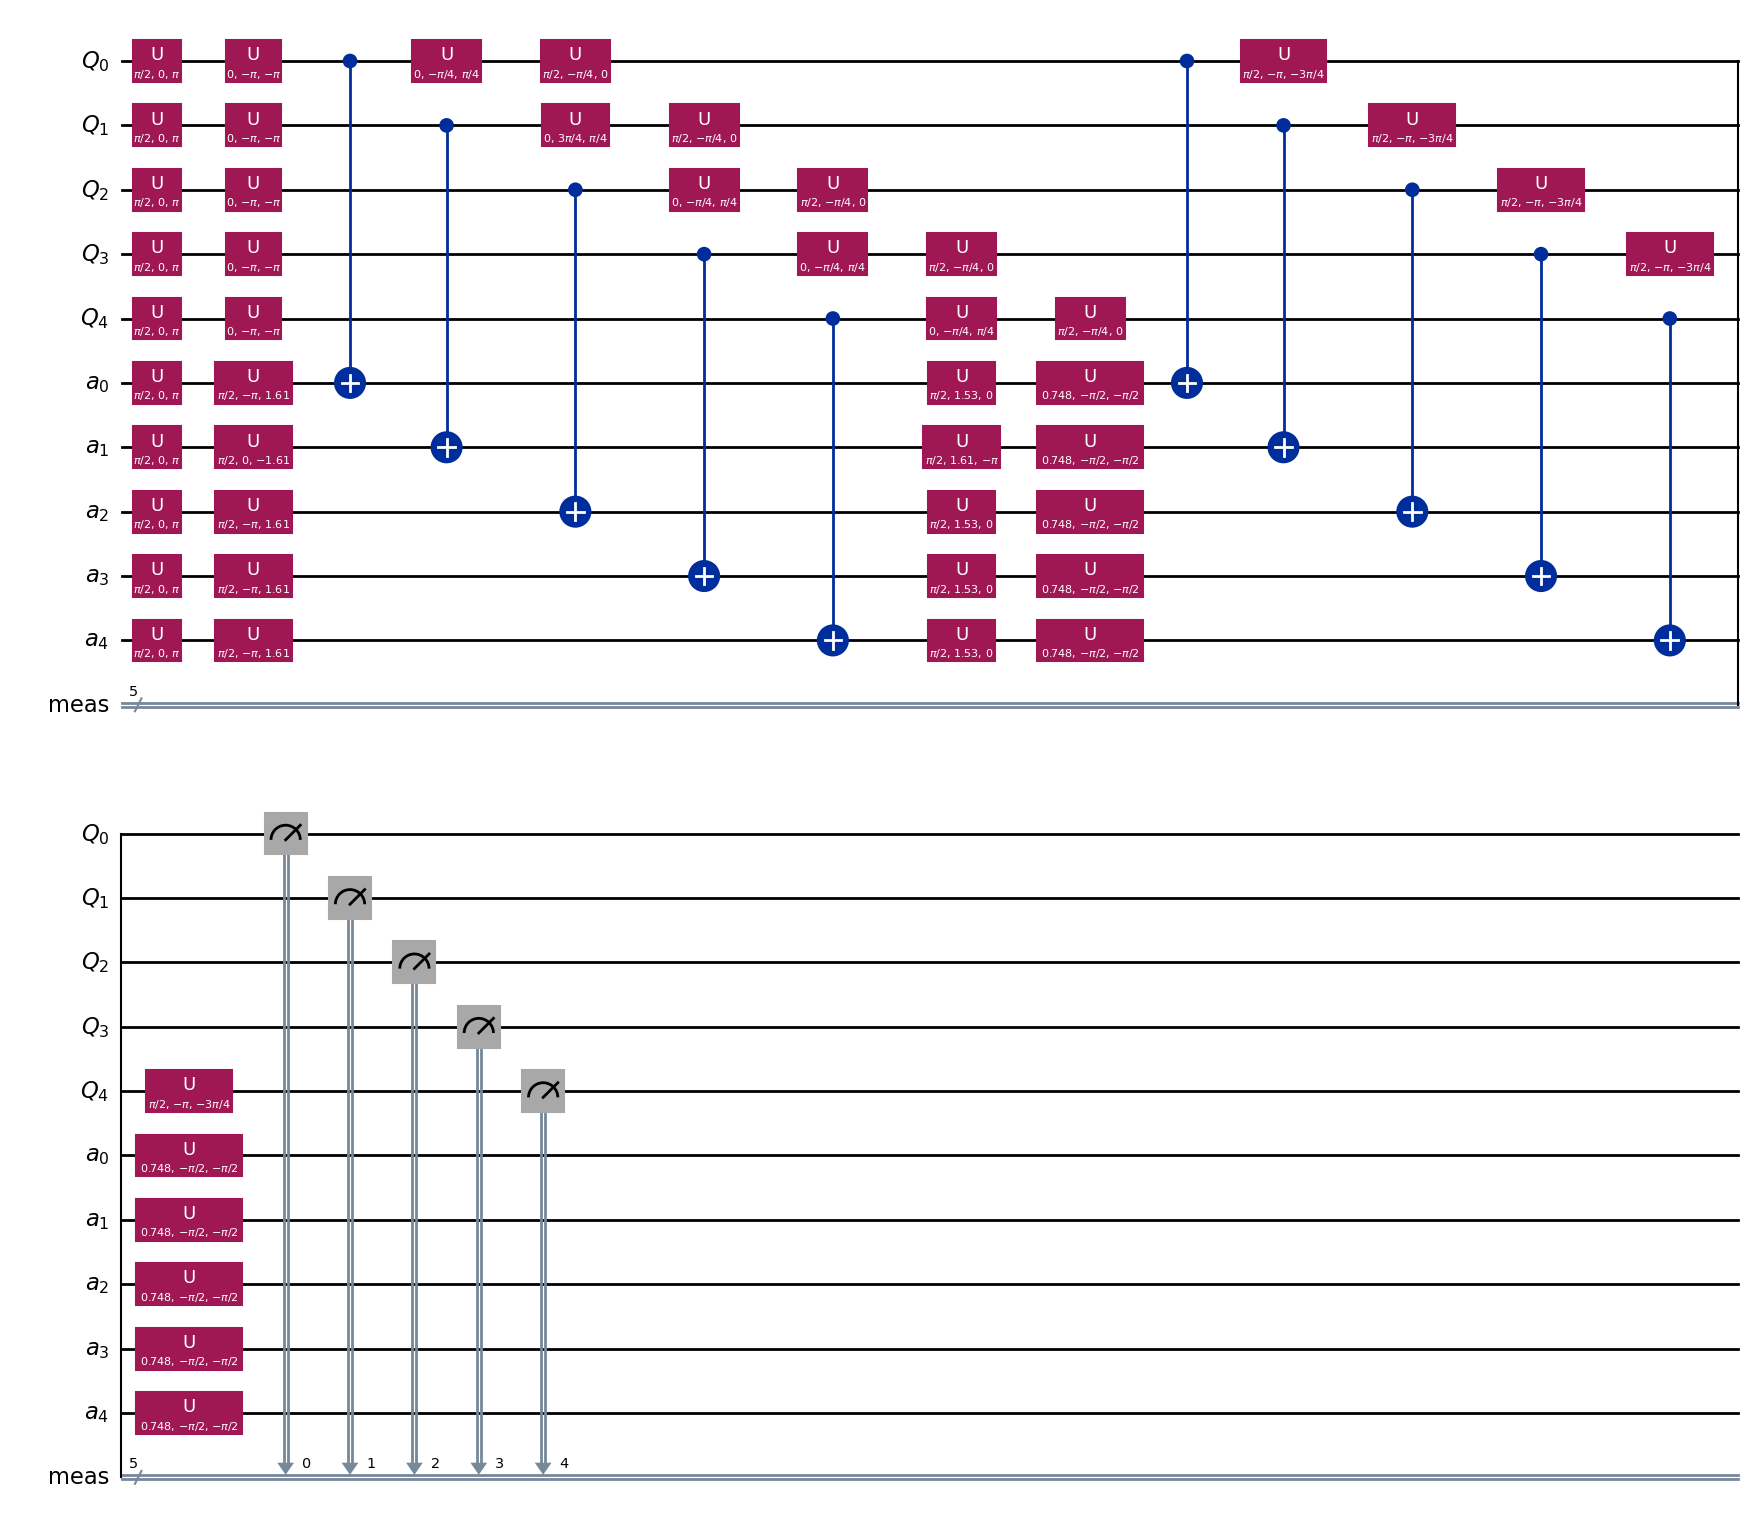

In [3]:
qc.decompose(reps=3).draw('mpl')

In [4]:
qc.decompose(reps=2).depth()

8

In [5]:
get_counts = qc.decompose(reps=3).count_ops()
cnot_count = get_counts.get('cx',0)
print(cnot_count)

10


In [6]:
get_counts = qc.decompose(reps=3).count_ops()
cnot_count = get_counts.get('u',0)
print(cnot_count)

50
